## US 2020 Election Analysis 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from warnings import filterwarnings
import plotly.express as px

#### Number of Voters per USA states

In [41]:
voters = pd.read_csv('number_of_voters_per_usa_state_2020.csv')
voters.head()

,state,votes,electoral_vote,usa_state,usa_state_code
0,Delaware,502384,0.0,Delaware,DE
1,District of Columbia,279152,0.0,District of Columbia,DC
2,Florida,11075706,0.0,Florida,FL
3,Georgia,4983735,0.0,Georgia,GA
4,Hawaii,573854,0.0,Hawaii,HI


In [77]:
fig = px.choropleth(voters,
                    locations = 'usa_state_code',
                    locationmode= 'USA-states',
                    scope = 'usa',
                    color = 'votes',
                    hover_name= 'state',
                    hover_data = ['votes'],
                    range_color = [voters['votes'].min(),voters['votes'].max()],
                    color_continuous_scale = 'armyrose',
                    title = 'US 2020 Number of Voters Map'       
)


# Displaying the map
fig.show(renderer = 'browser')

![US 2020 number of voters.png](<attachment:US 2020 number of voters.png>)
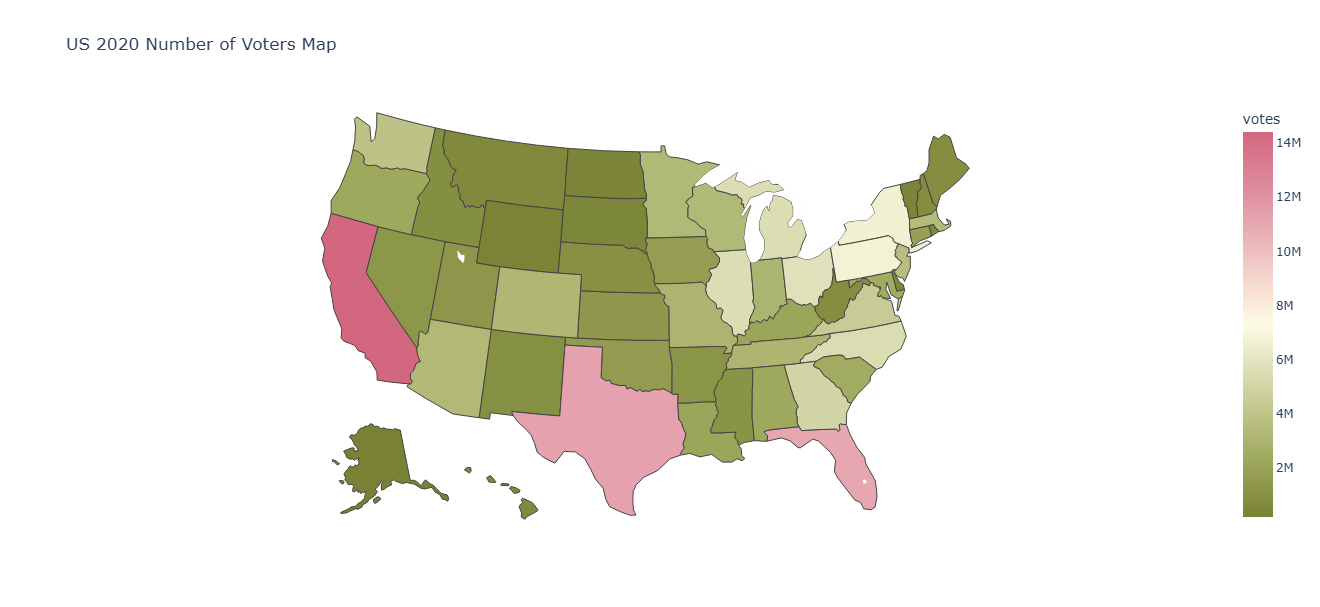

### Votes Counts for Entire Country

In [61]:
votes_counts = pd.read_csv('vote_counts_democratic_vs_republican_for_entire_country.csv')
votes_counts

,votes
0,76193955
1,71500110


In [112]:
votes_counts_df = pd.DataFrame({
    'Category': ['Democratic', 'Republican'],
    'Votes': [votes_counts.loc[0], votes_counts.loc[1]],
})

In [ ]:
sns.barplot(x = 'Category', 
            y = 'Votes',
            color='grey',
            data = votes_counts_df
        )

<BarContainer object of 2 artists>

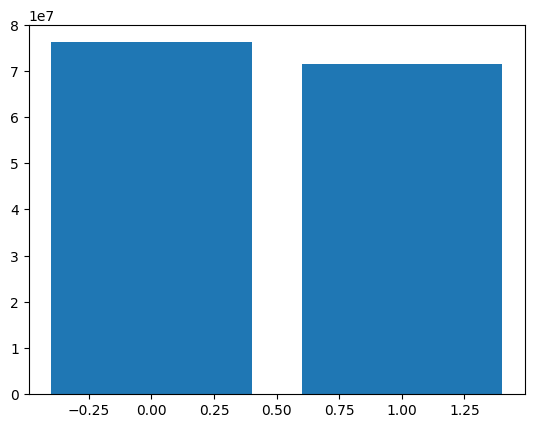

In [115]:
plt.bar(votes_counts.index, 
        votes_counts['votes'],
        color = 'grey'
    )

<BarContainer object of 2 artists>

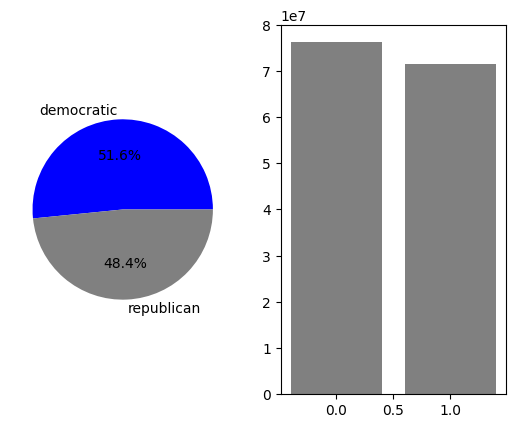

In [131]:
plt.tight_layout()
plt.subplot(1,2,1)
# plt.gca().set_facecolor('lightgray')
plt.pie(votes_counts.votes, 
        labels = ['democratic','republican'],
        autopct = '%1.1f%%',
        colors = ['blue', 'grey']
    )


plt.subplot(1,2,2)
plt.bar(votes_counts.index, 
        votes_counts['votes'], 
        color = 'grey'
    )

### Democratic vs Republican Votes

In [6]:
df = pd.read_csv('democratic_vs_republican_votes_by_usa_state_2020.csv')
df.head()

,state,DEM,REP,usa_state,usa_state_code,percent_democrat
0,Alabama,843473,1434159,Alabama,AL,37.032892
1,Alaska,45758,80999,Alaska,AK,36.098993
2,Arizona,1643664,1626679,Arizona,AZ,50.259682
3,Arkansas,420985,761251,Arkansas,AR,35.609218
4,California,9315259,4812735,California,CA,65.934760


In [22]:
df['percent_republican'] = 100 - df['percent_democrat']

In [23]:
df.head()

,state,DEM,REP,usa_state,usa_state_code,percent_democrat,percent_republican
0,Alabama,843473,1434159,Alabama,AL,37.032892,62.967108
1,Alaska,45758,80999,Alaska,AK,36.098993,63.901007
2,Arizona,1643664,1626679,Arizona,AZ,50.259682,49.740318
3,Arkansas,420985,761251,Arkansas,AR,35.609218,64.390782
4,California,9315259,4812735,California,CA,65.934760,34.065240


In [133]:
fig = px.choropleth(df,
                    locations = 'usa_state_code',
                    locationmode= 'USA-states',
                    scope = 'usa',
                    color = 'percent_democrat',
                    hover_name= 'state',
                    hover_data = ['DEM', 'percent_democrat'],
                    range_color = [10,90],
                    color_continuous_scale = 'armyrose',
                    title = 'Percentage of Democratic Votes'               
)

fig.show(renderer = 'browser')

![Percent Democrat.png](<attachment:Percent Democrat.png>)
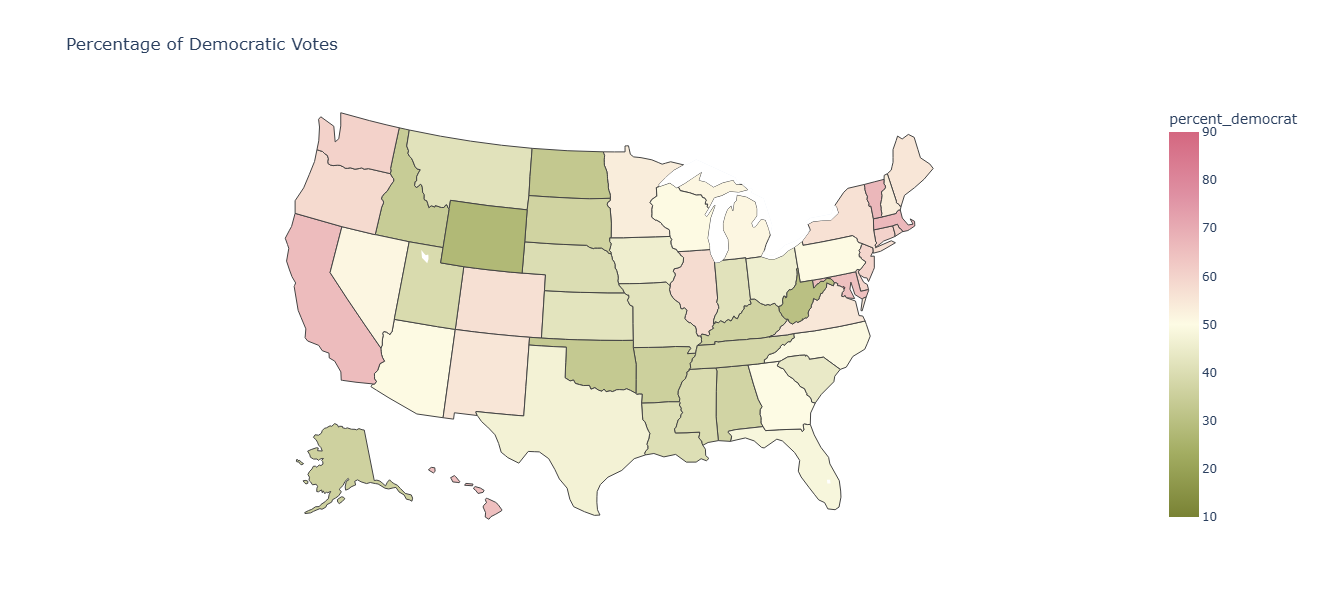

In [134]:
fig = px.choropleth(df,
                    locations = 'usa_state_code',
                    locationmode= 'USA-states',
                    scope = 'usa',
                    color = 'percent_republican',
                    hover_name= 'state',
                    hover_data = ['REP', 'percent_republican'],
                    range_color = [10,90],
                    color_continuous_scale = 'armyrose',
                    title = 'Percentage of Republican Votes'              
)

fig.show(renderer = 'browser')

![Percent of Republican Votes.png](<attachment:Percent of Republican Votes.png>)
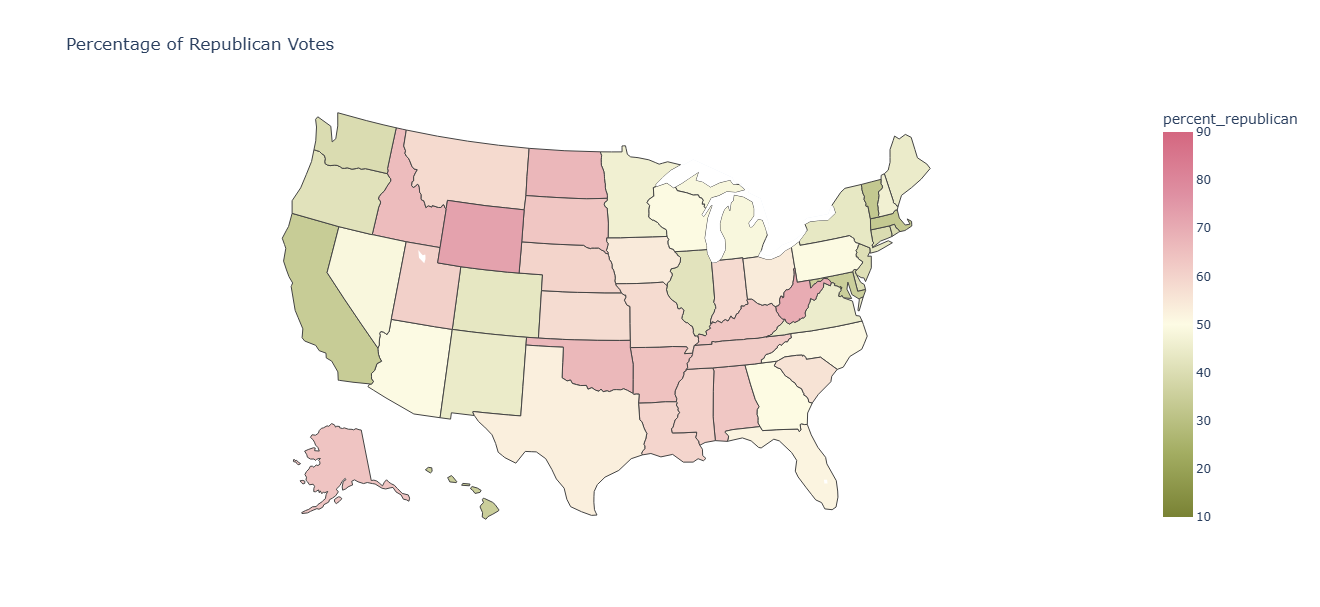